# Solving the n-Queens Problem using Local Search

Student Name: Travis Peck

I have used the following AI tools: GPT 3.5

I understand that my submission needs to be my own work: [your initials]

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum.

## Helper functions

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""

    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)

    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n

    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1

    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# decrease the font size to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):
    """display the board"""

    n = len(board)

    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0):
                display[i,j] = 1

    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap,
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])

    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize,
                 horizontalalignment = 'center',
                 verticalalignment = 'center')

    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


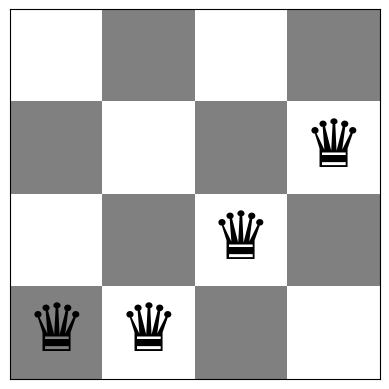

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [6]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


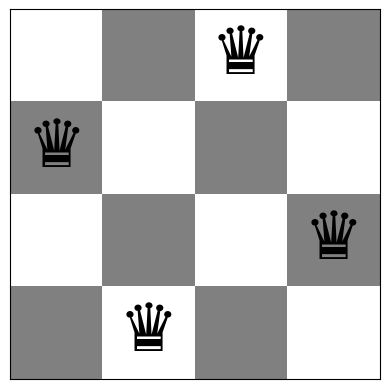

In [7]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum.

In [8]:
# Code and description go here
# Generates a list of potential local improvement moves
def neighbors(board):
    n = len(board)
    neighborslist = []
    # Iterates through each column and generates a possible move wiht a queen on every possible column
    # Generating this space is quite time intensive
    for col in range(0,n):
        for row in range(0,n):
            newboard = board.copy()
            # Generates a new copy for every possible queen location on each row
            newboard[col] = row
            neighborslist.append(newboard)
    return neighborslist

In [9]:
# Time module to time ourselves for the analysis later in the assignmetn
import time

def steepestAscent(board, max_iter=1000):
    start = time.time()
    currentboard = board

    # I got the idea to use max_iter from chatgpt. Everything else is my own work
    for i in range(max_iter):
        # Generating the current number of conflicts
        current_heuristic = conflicts(currentboard)
        # If no conflicts, returning the board
        if current_heuristic == 0:
            break
        # Generates neighbors list to explore local moves
        neighborslist = neighbors(currentboard)
        # Finds the local move with the lowest number of conflicts, saves it as bestneigbor
        bestneighbor = min(neighborslist, key=conflicts)
        bestneighbor_heuristic = conflicts(bestneighbor)
        # If we reach a point where the best neighbor is the lowest heuristic, we found an optimum (although perhaps local)
        if bestneighbor_heuristic >= current_heuristic:
            break
        currentboard = bestneighbor
    
    end = time.time()
    runtime = end-start
    return currentboard, conflicts(currentboard), runtime
    

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

In [10]:
# Code and description go here
import random

def stochasticHill(board, max_iter=10000):
    start = time.time()
    currentboard = board
    # I got the idea to use max_iter and the probabilities list from chatgpt. Everything else is my own work
    for i in range(max_iter):
        # Generating current conflicts 
        current_heuristic = conflicts(currentboard)
        # If no conflicts, return the current board (local optimum)
        if current_heuristic == 0:
            end = time.time()
            runtime = end-start
            return currentboard, conflicts(currentboard), runtime
        # Generates list of potential local moves using my neighbors function
        neighborslist = neighbors(currentboard)
        # Generating list of options I will choose from randomly
        # List contains all local moves with less conflicts than current state
        options = [neighbor for neighbor in neighborslist if conflicts(neighbor) < current_heuristic]
        # If no other options with less conflicts, return the current state as the local optimum
        if len(options) == 0:
            end = time.time()
            runtime = end-start
            return currentboard, conflicts(currentboard), runtime
        # Generating list of probabilities proportional to the amount of conflicts a move has
        probabilities = [(current_heuristic-conflicts(neighbor)) / current_heuristic for neighbor in options]
        # Randomly selected from the list of options with proportional probabilities I just made
        selected = random.choices(options, weights=probabilities)
        # This simply unpacks the list. Result of debugging 
        selected = selected[0]
        # Setting the current board as the new, selected board chosen with our probabilities 
        currentboard = selected

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

In [11]:
# Code and description go here
import random

def firstChoice(board):
    start = time.time()
    currentboard = board
    current_heuristic = conflicts(currentboard)
    # This is used to detect our local optima
    tries = 0
    #I got the idea to use max_iter and the probabilities list from chatgpt. Everything else is my own work
    while tries <= 10000:
        current_heuristic = conflicts(currentboard)
        neighborslist = neighbors(currentboard)
        # Randomly selecting an option from our list of local moves
        selected = random.choice(neighborslist)
        # If conflicts is 0, return the state as the current optima
        if current_heuristic == 0:
            break
        # If the new selected state has less conflicts, set as the new current board
        elif conflicts(selected) < current_heuristic:
            currentboard = selected
        #Increments the tries
        else:
            tries += 1
    end = time.time()
    runtime = end-start
    return currentboard, conflicts(currentboard), runtime

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

Board with 0 conflicts.


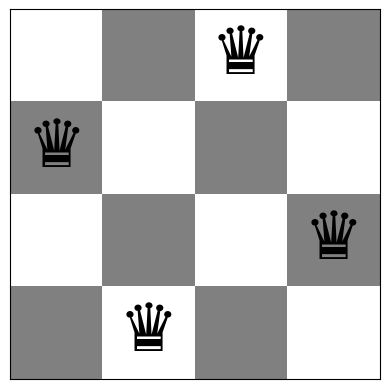

In [45]:
# Code and description go here
# Restarts 100 times until perhaps a global optima is found
def restartSteepestAscent():
    for _ in range(0,99):
        board = random_board(4)
        result, numconflicts, runtime = steepestAscent(board)
        # if conflicts is 0, return the optima
        if numconflicts == 0:
            return result

result = restartSteepestAscent()
show_board(result)

Board with 0 conflicts.


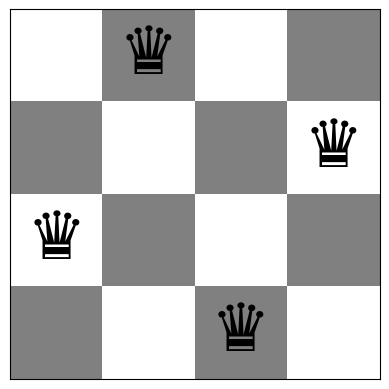

In [13]:
# Running 100 times until optima is found
def restartStochasticHill():
    for _ in range(0,99):
        board = random_board(4)
        result, numconflicts, runtime = stochasticHill(board)
        # If no conflicts, return the optima
        if numconflicts == 0:
            return result

result = restartStochasticHill()
show_board(result)

Board with 0 conflicts.


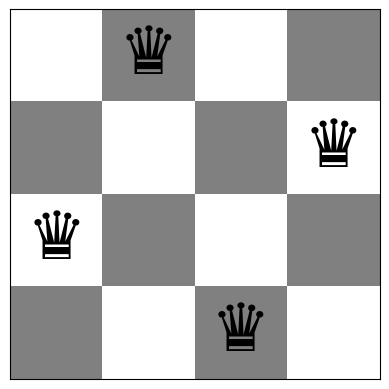

In [14]:

def restartFirstChoice():
    for _ in range(0,99):
        board = random_board(4)
        result, numconflicts, runtime = firstChoice(board)
        # If no conflicts found, return the optima
        if numconflicts == 0:
            return result

result = restartFirstChoice()
show_board(result)

## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Compare the performance with the previous algorithms.
2. Discuss your choice of annealing schedule.

In [15]:
# Code and description go here
import math
import random

# Setting a default temperature, cooling rate, and max iteration
def simAnnealing(board, temp=100, coolrate=.95, maxiters=10000000):
    start = time.time()
    currentboard = board
    # Setting max iters so we don't find outselves in an infinite loop (I had this problem for a while)
    for _ in range(0,maxiters):
        # If temperature is very low, break
        if temp <= .0001:
            break
        # Finding current amount of conflicts
        currentconflicts = conflicts(currentboard)
        # Generating list of local moves with neighbors function I made
        neighborslist = neighbors(currentboard)
        # Randomly selecting one board from the neighboring local moves
        nextboard = random.choice(neighborslist)
        # Setting the next moves conflicts in this nextconflicts variable
        nextconflicts = conflicts(nextboard)
        # Calculating the difference in conflicts, delta e
        deltae = nextconflicts-currentconflicts
        # If deltae is less than 0 (next board has less conflicts) 
        # OR randomly generated probability is less than the e^(-delta e / temperature) function, change current board to the next board
        if deltae < 0 or random.random() < math.exp(-deltae / temp):
            currentboard = nextboard
        #Adjusting the temperature
        temp *= coolrate
    end = time.time()
    runtime = end-start
    return currentboard, conflicts(currentboard), runtime
        

In [12]:
board = random_board(4)
result = simAnnealing(board)

## Task 6: Compare Performance [10 Points]

Compare the algorithm using runtime and objective function values. Use boards of size 4 and 8 to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 100 times) with different starting boards and report averages.

Complete the following table

| Algorithm           | Board size | Avg. Run time | Avg. number of conflicts | % of runs ending in optimal solution  |
| ------------------- | ---------- | ------------- | --------------------------------- | - |
| Steepest asc. HC    |     4      |   .00012       |           0.535                        |  48.5% |
| Stochastic HC 1     |     4      |     0.00014       |        0.80                         |  31.3% |
| Stochastic HC 2     |     4      |     0.06    |               0.78           | 36.4% |
| Simulated Annealing |     4      |      0.002       |             0.04                  |  95.9% |
| Steepest asc. HC    |     8      |        0.001       |         1.09                          | 19.2%  |
| Stochastic HC 1     |     8      |        0.0019     |            1.27                       |  15.2% |
| Stochastic HC 2     |     8      |         0.26      |           1.4                        |  8.0% |
| Simulated Annealing |     8      |          0.016     |            1.9                       |  3.0% |
| Steepest asc. HC    |     12     |        0.006       |              1.62                     | 8.1%  |
| Stochastic HC 1     |     12     |          0.0093     |                1.83                   |  6.0% |
| Stochastic HC 2     |     12     |           0.56    |                1.94                   | 1.0%  |
| Simulated Annealing |     12     |         .008      |               0.96                    | 15.2%  |
| Steepest asc. HC    |     16     |       0.01     |            1.81                       |  4.0% |
| Stochastic HC 1     |     16     |         .029      |            2.27                       |  0% |
| Stochastic HC 2     |     16     |          0.91     |               2.19                    | 0.03  |
| Simulated Annealing |     16     |        0.025       |             3.05                      |  0% |


Add the used code and the answer to the following questions below.

* How do the algorithms scale with problem size? You will need to run more board sizes. You can add the results to the table above and show the result as a chart.

* What is the largest board each algorithm can solve in a reasonable amount time?

Hint: See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

As we linearly increased the board size by 4, the average run time increased exponentially for all search algorithms except for simulated annealing. Simulated annealing increased linearly while the size increased linearly. The algorithms do not scale fairly with problem size except for simulated annealing. Furthermore, for each of the algorithms, the average number of conflicts increased as the board size increased. The percent of global optima that we found plummeted for each of the algorithms, but for simulated annealing, it plummeted slower than the rest. In fact simulated annealing had a very high amount of global optima found for sizes 4 and 12 compared to the rest. As to answer the second question, all of these algorithms can be run in a reasonable amount of time for high sizes. It would seem mundane to try anything larger than a 16 by 16 board, as the percent of global optima and avg number of conflicts would perform horribly. For the percent that actually find global optima (sizes 4 and 8 mainly), the time was very short and very reasonable. All of this to say is that for any reasonable board size that these algorithms can find any global optima for, they all perform in a reasonable amount of time

# Steepest Ascent

In [13]:
# Generating lists that we will use to found the averages
results = []
conflictlist = []
times = []

# Running each implementations 100 times and storing each value in a list
for i in range(0,99):
    board = random_board(4)
    result, numconflicts, runtime = steepestAscent(board)
    # Appending out lists
    results.append(result)
    conflictlist.append(numconflicts)
    times.append(runtime)

# Calculating average runtime, conflicts, and percent of our conflicts that are optimal
avgtime = sum(times) / len(times)
avgconflicts = sum(conflictlist) / len(conflictlist)
percentoptimal = len([x for x in conflictlist if x==0]) / len(conflictlist)

print('Avg Runtime:', avgtime)
print('Avg Num of Conflicts:', avgconflicts)
print('Percent Optimal Solutions:', percentoptimal)

Avg Runtime: 0.00012495300986550072
Avg Num of Conflicts: 0.5353535353535354
Percent Optimal Solutions: 0.48484848484848486


In [14]:
results = []
conflictlist = []
times = []

for i in range(0,99):
    board = random_board(8)
    result, numconflicts, runtime = steepestAscent(board)
    results.append(result)
    conflictlist.append(numconflicts)
    times.append(runtime)

avgtime = sum(times) / len(times)
avgconflicts = sum(conflictlist) / len(conflictlist)
percentoptimal = len([x for x in conflictlist if x==0]) / len(conflictlist)

print('Avg Runtime:', avgtime)
print('Avg Num of Conflicts:', avgconflicts)
print('Percent Optimal Solutions:', percentoptimal)

Avg Runtime: 0.0013629667686693597
Avg Num of Conflicts: 1.0909090909090908
Percent Optimal Solutions: 0.1919191919191919


In [15]:
results = []
conflictlist = []
times = []

for i in range(0,99):
    board = random_board(12)
    result, numconflicts, runtime = steepestAscent(board)
    results.append(result)
    conflictlist.append(numconflicts)
    times.append(runtime)

avgtime = sum(times) / len(times)
avgconflicts = sum(conflictlist) / len(conflictlist)
percentoptimal = len([x for x in conflictlist if x==0]) / len(conflictlist)

print('Avg Runtime:', avgtime)
print('Avg Num of Conflicts:', avgconflicts)
print('Percent Optimal Solutions:', percentoptimal)

Avg Runtime: 0.006109695241908834
Avg Num of Conflicts: 1.6161616161616161
Percent Optimal Solutions: 0.08080808080808081


In [16]:
results = []
conflictlist = []
times = []

for i in range(0,99):
    board = random_board(16)
    result, numconflicts, runtime = steepestAscent(board)
    results.append(result)
    conflictlist.append(numconflicts)
    times.append(runtime)

avgtime = sum(times) / len(times)
avgconflicts = sum(conflictlist) / len(conflictlist)
percentoptimal = len([x for x in conflictlist if x==0]) / len(conflictlist)

print('Avg Runtime:', avgtime)
print('Avg Num of Conflicts:', avgconflicts)
print('Percent Optimal Solutions:', percentoptimal)

Avg Runtime: 0.01860335860589538
Avg Num of Conflicts: 1.8080808080808082
Percent Optimal Solutions: 0.04040404040404041


# Stochastic Hill 1

In [17]:
results = []
conflictlist = []
times = []

for i in range(0,99):
    board = random_board(4)
    result, numconflicts, runtime = stochasticHill(board)
    results.append(result)
    conflictlist.append(numconflicts)
    times.append(runtime)

avgtime = sum(times) / len(times)
avgconflicts = sum(conflictlist) / len(conflictlist)
percentoptimal = len([x for x in conflictlist if x==0]) / len(conflictlist)

print('Avg Runtime:', avgtime)
print('Avg Num of Conflicts:', avgconflicts)
print('Percent Optimal Solutions:', percentoptimal)

Avg Runtime: 0.0001470464648622455
Avg Num of Conflicts: 0.8080808080808081
Percent Optimal Solutions: 0.31313131313131315


In [18]:
results = []
conflictlist = []
times = []

for i in range(0,99):
    board = random_board(8)
    result, numconflicts, runtime = stochasticHill(board)
    results.append(result)
    conflictlist.append(numconflicts)
    times.append(runtime)

avgtime = sum(times) / len(times)
avgconflicts = sum(conflictlist) / len(conflictlist)
percentoptimal = len([x for x in conflictlist if x==0]) / len(conflictlist)

print('Avg Runtime:', avgtime)
print('Avg Num of Conflicts:', avgconflicts)
print('Percent Optimal Solutions:', percentoptimal)

Avg Runtime: 0.0019735423001376066
Avg Num of Conflicts: 1.2727272727272727
Percent Optimal Solutions: 0.15151515151515152


In [19]:
results = []
conflictlist = []
times = []

for i in range(0,99):
    board = random_board(12)
    result, numconflicts, runtime = stochasticHill(board)
    results.append(result)
    conflictlist.append(numconflicts)
    times.append(runtime)

avgtime = sum(times) / len(times)
avgconflicts = sum(conflictlist) / len(conflictlist)
percentoptimal = len([x for x in conflictlist if x==0]) / len(conflictlist)

print('Avg Runtime:', avgtime)
print('Avg Num of Conflicts:', avgconflicts)
print('Percent Optimal Solutions:', percentoptimal)

Avg Runtime: 0.009255727132161459
Avg Num of Conflicts: 1.8383838383838385
Percent Optimal Solutions: 0.06060606060606061


In [20]:
results = []
conflictlist = []
times = []

for i in range(0,99):
    board = random_board(16)
    result, numconflicts, runtime = stochasticHill(board)
    results.append(result)
    conflictlist.append(numconflicts)
    times.append(runtime)

avgtime = sum(times) / len(times)
avgconflicts = sum(conflictlist) / len(conflictlist)
percentoptimal = len([x for x in conflictlist if x==0]) / len(conflictlist)

print('Avg Runtime:', avgtime)
print('Avg Num of Conflicts:', avgconflicts)
print('Percent Optimal Solutions:', percentoptimal)

Avg Runtime: 0.029950869203817964
Avg Num of Conflicts: 2.272727272727273
Percent Optimal Solutions: 0.0


# Stochastic Hill 2

In [21]:
results = []
conflictlist = []
times = []

for i in range(0,99):
    board = random_board(4)
    result, numconflicts, runtime = firstChoice(board)
    results.append(result)
    conflictlist.append(numconflicts)
    times.append(runtime)

avgtime = sum(times) / len(times)
avgconflicts = sum(conflictlist) / len(conflictlist)
percentoptimal = len([x for x in conflictlist if x==0]) / len(conflictlist)

print('Avg Runtime:', avgtime)
print('Avg Num of Conflicts:', avgconflicts)
print('Percent Optimal Solutions:', percentoptimal)

Avg Runtime: 0.06101259799918743
Avg Num of Conflicts: 0.7777777777777778
Percent Optimal Solutions: 0.36363636363636365


In [22]:
results = []
conflictlist = []
times = []

for i in range(0,99):
    board = random_board(8)
    result, numconflicts, runtime = firstChoice(board)
    results.append(result)
    conflictlist.append(numconflicts)
    times.append(runtime)

avgtime = sum(times) / len(times)
avgconflicts = sum(conflictlist) / len(conflictlist)
percentoptimal = len([x for x in conflictlist if x==0]) / len(conflictlist)

print('Avg Runtime:', avgtime)
print('Avg Num of Conflicts:', avgconflicts)
print('Percent Optimal Solutions:', percentoptimal)

Avg Runtime: 0.26044295291707975
Avg Num of Conflicts: 1.404040404040404
Percent Optimal Solutions: 0.08080808080808081


In [23]:
results = []
conflictlist = []
times = []

for i in range(0,99):
    board = random_board(12)
    result, numconflicts, runtime = firstChoice(board)
    results.append(result)
    conflictlist.append(numconflicts)
    times.append(runtime)

avgtime = sum(times) / len(times)
avgconflicts = sum(conflictlist) / len(conflictlist)
percentoptimal = len([x for x in conflictlist if x==0]) / len(conflictlist)

print('Avg Runtime:', avgtime)
print('Avg Num of Conflicts:', avgconflicts)
print('Percent Optimal Solutions:', percentoptimal)

Avg Runtime: 0.564387215508355
Avg Num of Conflicts: 1.9494949494949494
Percent Optimal Solutions: 0.010101010101010102


In [24]:
results = []
conflictlist = []
times = []

for i in range(0,99):
    board = random_board(16)
    result, numconflicts, runtime = firstChoice(board)
    results.append(result)
    conflictlist.append(numconflicts)
    times.append(runtime)

avgtime = sum(times) / len(times)
avgconflicts = sum(conflictlist) / len(conflictlist)
percentoptimal = len([x for x in conflictlist if x==0]) / len(conflictlist)

print('Avg Runtime:', avgtime)
print('Avg Num of Conflicts:', avgconflicts)
print('Percent Optimal Solutions:', percentoptimal)

Avg Runtime: 0.9127063221401639
Avg Num of Conflicts: 2.191919191919192
Percent Optimal Solutions: 0.030303030303030304


# Simulated Annealing

In [25]:
results = []
conflictlist = []
times = []

for i in range(0,99):
    board = random_board(4)
    result, numconflicts, runtime = simAnnealing(board)
    results.append(result)
    conflictlist.append(numconflicts)
    times.append(runtime)

avgtime = sum(times) / len(times)
avgconflicts = sum(conflictlist) / len(conflictlist)
percentoptimal = len([x for x in conflictlist if x==0]) / len(conflictlist)

print('Avg Runtime:', avgtime)
print('Avg Num of Conflicts:', avgconflicts)
print('Percent Optimal Solutions:', percentoptimal)

Avg Runtime: 0.0027173456519541113
Avg Num of Conflicts: 0.04040404040404041
Percent Optimal Solutions: 0.9595959595959596


In [26]:
results = []
conflictlist = []
times = []

for i in range(0,99):
    board = random_board(8)
    result, numconflicts, runtime = simAnnealing(board)
    results.append(result)
    conflictlist.append(numconflicts)
    times.append(runtime)

avgtime = sum(times) / len(times)
avgconflicts = sum(conflictlist) / len(conflictlist)
percentoptimal = len([x for x in conflictlist if x==0]) / len(conflictlist)

print('Avg Runtime:', avgtime)
print('Avg Num of Conflicts:', avgconflicts)
print('Percent Optimal Solutions:', percentoptimal)

Avg Runtime: 0.007802060156157522
Avg Num of Conflicts: 0.9696969696969697
Percent Optimal Solutions: 0.15151515151515152


In [27]:
results = []
conflictlist = []
times = []

for i in range(0,99):
    board = random_board(12)
    result, numconflicts, runtime = simAnnealing(board)
    results.append(result)
    conflictlist.append(numconflicts)
    times.append(runtime)

avgtime = sum(times) / len(times)
avgconflicts = sum(conflictlist) / len(conflictlist)
percentoptimal = len([x for x in conflictlist if x==0]) / len(conflictlist)

print('Avg Runtime:', avgtime)
print('Avg Num of Conflicts:', avgconflicts)
print('Percent Optimal Solutions:', percentoptimal)

Avg Runtime: 0.01575487551062998
Avg Num of Conflicts: 1.9090909090909092
Percent Optimal Solutions: 0.030303030303030304


In [28]:
results = []
conflictlist = []
times = []

for i in range(0,99):
    board = random_board(16)
    result, numconflicts, runtime = simAnnealing(board)
    results.append(result)
    conflictlist.append(numconflicts)
    times.append(runtime)

avgtime = sum(times) / len(times)
avgconflicts = sum(conflictlist) / len(conflictlist)
percentoptimal = len([x for x in conflictlist if x==0]) / len(conflictlist)

print('Avg Runtime:', avgtime)
print('Avg Num of Conflicts:', avgconflicts)
print('Percent Optimal Solutions:', percentoptimal)

Avg Runtime: 0.025800353348857226
Avg Num of Conflicts: 3.0505050505050506
Percent Optimal Solutions: 0.0


## Advanced task: Exploring other Local Moves

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

Implement a few different local moves. Implement:

* moving one queen only one square at a time
* switching two columns
* move two queens at a time

Compare the performance of these moves for the 8-Queens problem using your stochastic hill climbing 2 implementation from above. Also consider mixing the use of several types of local moves (e.g., move one queen and moving two queens).

Describe what you find out about how well these moves and combinations of these moves work.

All of these methods to find local moves had similar runtimes of less than a second. Regarding performance, moving one queen at a time had the worst performance, having 4 conflicts by the end. Switching two columns performed poor as well, with 3 conflicts. Moving two queens at once led to 1 conflict. These three methods by themselves seemed to only find a local optima. Strikingly, finding the local moves with the first and third methods combined found global optima 100% of the time. I generated a list of moves using the 'moving one queen one square at a time' and appending that list of moves with the 'two queens at a time' list of local moves as well. Using this concatenated list generated global optima (0 conflicts) every single time I ran it. It took about 20% more time than the other algorithms though.

# One queen one square at a time

In [47]:
# These functions will essentially replace the 'neighbors' function
# These will be new functions to generate local moves

def oneSquareNeighbors(board):
    # Setting the length of the board to use
    n = len(board)
    neighborslist = []
    # Iterating through each queen
    for col in range(0,n):
        # Creating two copies of the board that will move the queen one space down or up
        newboard1 = board.copy()
        newboard2 = board.copy()
        # Moving the queen down a space
        newboard1[col] -= 1
        # If out of bound (too low), queen goes back to top
        if newboard1[col] < 0:
            newboard1[col] = n-1
        # Moving queen up once
        newboard2[col] += 1
        # If out of bounds (too high), queen goes to bottom
        if newboard2[col] > n-1:
            newboard2[col] = 0
        # Appending the local moves list with the queens one space away
        neighborslist.append(newboard1)
        neighborslist.append(newboard2)
    return neighborslist

# Swapping columns

In [48]:
# We will swap two columns

def columnSwap(board):
    n = len(board)
    neighborslist = []
    # Iterating through each queen...
    for col in range(0,n):
        # Creating new board
        newboard = board.copy()
        # Randomly choosing an index to swap
        swapper = random.randint(0, n-1)
        # Swapping the board value (queen row) with another board value
        newboard[col] = newboard[swapper]
        newboard[swapper] = newboard[col]
        # Appending the local move list
        neighborslist.append(newboard)
    return neighborslist

# Moving two queens simultaneously

In [49]:
# Moving two queens at once

def twoQueens(board):
    n = len(board)
    neighborslist = []
    # Iterating through each queen
    for col in range(0,n):
        # Creating a copy board
        newboard = board.copy()
        # Generating a random index that will randomly move a queen to this row
        rand = random.randint(0,n-1)
        # Moving a queen to this row
        newboard[col] = rand
        # Selecting another random queen to move
        # Moving it to another randomly selected row
        newboard[random.randint(0,n-1)] = random.randint(0,n-1)
        # Appending the local moves
        neighborslist.append(newboard)
    return neighborslist

# Testing these new methods...

Final board: [2 4 7 7 3 1 2 0]
Conflicts: 4
Runtime: 0.17255592346191406
Board with 4 conflicts.


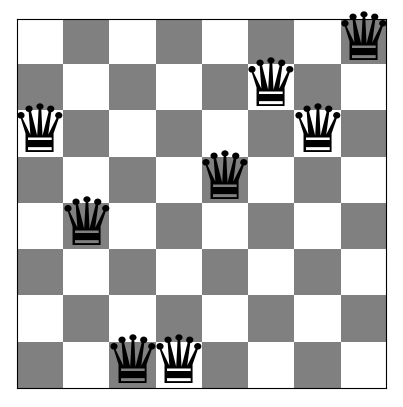

In [50]:
# Code and description go here
import random

def firstChoice(board):
    start = time.time()
    currentboard = board
    current_heuristic = conflicts(currentboard)
    tries = 0
    while tries <= 10000:
        current_heuristic = conflicts(currentboard)

        # This is the only line of code I changed in the function
        # Uses the new function that finds local moves
        neighborslist = oneSquareNeighbors(currentboard)

        selected = random.choice(neighborslist)
        if current_heuristic == 0:
            break
        elif conflicts(selected) < current_heuristic:
            currentboard = selected
        else:
            tries += 1
    end = time.time()
    runtime = end-start
    return currentboard, conflicts(currentboard), runtime

board = random_board(8)
result, numconflicts, runtime = firstChoice(board)
print('Final board:', result)
print('Conflicts:', numconflicts)
print('Runtime:', runtime)
show_board(result)

Final board: [4 6 3 6 4 1 5 5]
Conflicts: 3
Runtime: 0.1477220058441162
Board with 3 conflicts.


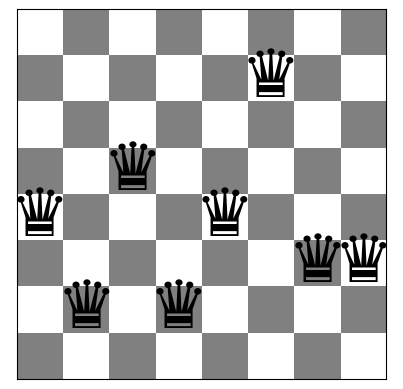

In [52]:
# Code and description go here
import random

def firstChoice(board):
    start = time.time()
    currentboard = board
    current_heuristic = conflicts(currentboard)
    tries = 0
    #I got the idea to use max_iter and the probabilities list from chatgpt. Everything else is my own work
    while tries <= 10000:
        current_heuristic = conflicts(currentboard)
        neighborslist = columnSwap(currentboard)
        selected = random.choice(neighborslist)
        if current_heuristic == 0:
            break
        elif conflicts(selected) < current_heuristic:
            currentboard = selected
        else:
            tries += 1
    end = time.time()
    runtime = end-start
    return currentboard, conflicts(currentboard), runtime

board = random_board(8)
result, numconflicts, runtime = firstChoice(board)
print('Final board:', result)
print('Conflicts:', numconflicts)
print('Runtime:', runtime)
show_board(result)

Final board: [3 7 0 4 1 5 0 2]
Conflicts: 1
Runtime: 0.1891040802001953
Board with 1 conflicts.


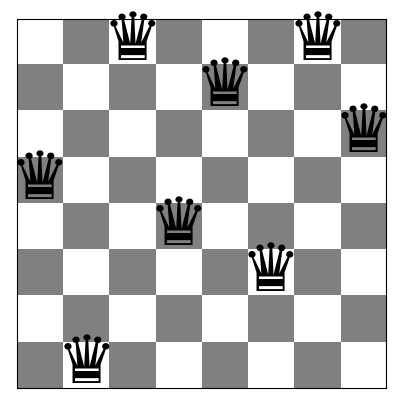

In [53]:
# Code and description go here
import random

def firstChoice(board):
    start = time.time()
    currentboard = board
    current_heuristic = conflicts(currentboard)
    tries = 0
    while tries <= 10000:
        current_heuristic = conflicts(currentboard)
        neighborslist = twoQueens(currentboard)
        selected = random.choice(neighborslist)
        if current_heuristic == 0:
            break
        elif conflicts(selected) < current_heuristic:
            currentboard = selected
        else:
            tries += 1
    end = time.time()
    runtime = end-start
    return currentboard, conflicts(currentboard), runtime

board = random_board(8)
result, numconflicts, runtime = firstChoice(board)
print('Final board:', result)
print('Conflicts:', numconflicts)
print('Runtime:', runtime)
show_board(result)

# Combining the 'one queen, one square at a time' and 'two queens at once' functions to find local moves

### This last test performed amazingly well, finding global optima every time

Final board: [2 5 1 4 7 0 6 3]
Conflicts: 0
Runtime: 0.20499920845031738
Board with 0 conflicts.


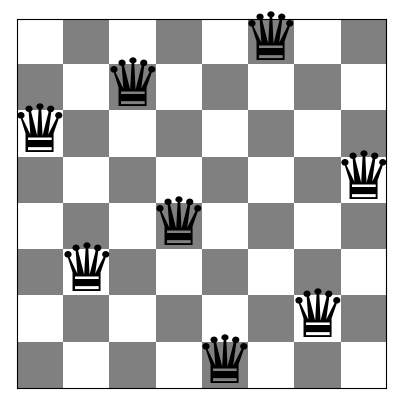

In [54]:
# Code and description go here
import random

def firstChoice(board):
    start = time.time()
    currentboard = board
    current_heuristic = conflicts(currentboard)
    tries = 0
    while tries <= 10000:
        current_heuristic = conflicts(currentboard)
        neighborslist = oneSquareNeighbors(currentboard)
        neighborslist2 = twoQueens(currentboard)
        for i in neighborslist2:
            neighborslist.append(i)
        selected = random.choice(neighborslist)
        if current_heuristic == 0:
            break
        elif conflicts(selected) < current_heuristic:
            currentboard = selected
        else:
            tries += 1
    end = time.time()
    runtime = end-start
    return currentboard, conflicts(currentboard), runtime

board = random_board(8)
result, numconflicts, runtime = firstChoice(board)
print('Final board:', result)
print('Conflicts:', numconflicts)
print('Runtime:', runtime)
show_board(result)

## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

In [55]:
# Code and description go here